install modules needed

In [1]:
# ! pip install numpy pandas sklearn

import modules needed

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel

loading dataset (breast cancer) from sklearn module

In [3]:
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

exploratory data analysis

In [4]:
bc_data = breast_cancer.data
print("breast cancer data: ", bc_data)

print("\ndimension of the data: ",bc_data.shape)

row_data_names = breast_cancer.feature_names
print("\n", len(row_data_names),"Features:\n",row_data_names)

column_data_names = breast_cancer.target_names
print("\ntypes of breast cancer: ", column_data_names)

samples = breast_cancer.target
print("\nall data samples: ", samples) # 0: malignant and 1: benign

breast cancer data:  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

dimension of the data:  (569, 30)

 30 Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst sy

Get Index for the breast cancer types from malignant and benign samples

In [5]:
malignant = []
benign = []
for i in range(len(samples)):
    if samples[i] == 0:
        malignant.append(i)
    else:
        benign.append(i)

print("\nIndex for malignant with size",len(malignant)," :\n",malignant)

print("\nIndex for benign with size",len(benign)," :\n",benign)


Index for malignant with size 212  :
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 47, 53, 54, 56, 57, 62, 64, 65, 70, 72, 73, 75, 77, 78, 82, 83, 85, 86, 87, 91, 94, 95, 99, 100, 105, 108, 117, 118, 119, 121, 122, 126, 127, 129, 131, 132, 134, 135, 138, 141, 146, 156, 161, 162, 164, 167, 168, 171, 172, 177, 180, 181, 182, 184, 186, 190, 193, 194, 196, 197, 198, 199, 201, 202, 203, 205, 207, 210, 212, 213, 214, 215, 218, 219, 223, 229, 230, 233, 236, 237, 239, 244, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 272, 274, 277, 280, 282, 283, 297, 300, 302, 317, 321, 323, 328, 329, 330, 335, 337, 339, 343, 351, 352, 353, 365, 366, 368, 369, 370, 372, 373, 379, 385, 389, 392, 393, 400, 408, 414, 417, 430, 432, 433, 435, 441, 444, 446, 449, 451, 460, 461, 468, 479, 487, 489, 492, 498, 499, 501, 503, 509, 512, 514, 516, 517, 521, 533, 535, 536, 562, 

In [6]:
print("\nthe first three samples with their features values:\n",bc_data[0:3,])


the first three samples with their features values:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


feature selection using chi-squared test

In [7]:
# initiate chi-squared with select k=3
chi2test_selector = SelectKBest(chi2, k=3)

# chi-squared selector to work with data and labeled samples
chi2test_model = chi2test_selector.fit(bc_data, samples)

# chi-squared scores
chi2_scores = (chi2test_selector.pvalues_)

chi2_p = []
chi2_p_row = []
for i in range(len(chi2_scores)):
    if chi2_scores[i] <= 0.05:
        chi2_p_row.append(row_data_names[i])
        chi2_p.append(chi2_scores[i])

# list all features with p-values less than 0.05
chi2_arr = pd.DataFrame({'features': chi2_p_row, 'p<0.05': chi2_p}, columns=['features', 'p<0.05'])
print((chi2_arr))

                features         p<0.05
0            mean radius   8.013976e-60
1           mean texture   3.322922e-22
2         mean perimeter   0.000000e+00
3              mean area   0.000000e+00
4       mean compactness   2.010130e-02
5         mean concavity   9.001757e-06
6    mean concave points   1.165636e-03
7           radius error   3.895534e-09
8        perimeter error   1.948775e-56
9             area error   0.000000e+00
10          worst radius  6.113248e-109
11         worst texture   7.896683e-40
12       worst perimeter   0.000000e+00
13            worst area   0.000000e+00
14     worst compactness   1.108368e-05
15       worst concavity   3.252301e-10
16  worst concave points   2.404244e-04


In [8]:
# sort p-values less than 0.05 in ascending
print("the top 5 features from p-values of chi-squared test:\n",chi2_arr.sort_values(by=['p<0.05'], ascending=True).head(5))

the top 5 features from p-values of chi-squared test:
            features  p<0.05
13       worst area     0.0
2    mean perimeter     0.0
3         mean area     0.0
12  worst perimeter     0.0
9        area error     0.0


In [9]:
index_feature = []
for i in range(len(row_data_names)):
  for j in range(len(chi2_arr["features"])):
    if row_data_names[i] == chi2_arr["features"][j]:
      index_feature += [i]

print("index for features selected: ", index_feature)
print("\nfeatures selected: ", row_data_names[index_feature])

index for features selected:  [0, 1, 2, 3, 5, 6, 7, 10, 12, 13, 20, 21, 22, 23, 25, 26, 27]

features selected:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'mean concave points' 'radius error'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst compactness' 'worst concavity'
 'worst concave points']


In [10]:
bc_data_df = pd.DataFrame(bc_data)
selected_bc_data = bc_data_df[:][index_feature]
print(selected_bc_data.head(3))

      0      1      2       3        5       6        7       10     12  \
0  17.99  10.38  122.8  1001.0  0.27760  0.3001  0.14710  1.0950  8.589   
1  20.57  17.77  132.9  1326.0  0.07864  0.0869  0.07017  0.5435  3.398   
2  19.69  21.25  130.0  1203.0  0.15990  0.1974  0.12790  0.7456  4.585   

       13     20     21     22      23      25      26      27  
0  153.40  25.38  17.33  184.6  2019.0  0.6656  0.7119  0.2654  
1   74.08  24.99  23.41  158.8  1956.0  0.1866  0.2416  0.1860  
2   94.03  23.57  25.53  152.5  1709.0  0.4245  0.4504  0.2430  


data splitting

In [11]:
# Split the data into features and target
X = selected_bc_data
y = samples

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 17)
y_train shape: (455,)
X_test shape: (114, 17)
y_test shape: (114,)


model development for training and testing using random forest

In [12]:
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

model evaluation

Accuracy: 95.61%

Confusion Matrix:
 [[40  3]
 [ 2 69]]

True Positives: 69
True Negatives: 40
False Positives: 3
False Negatives: 2

Precision: 0.96

Recall: 0.97


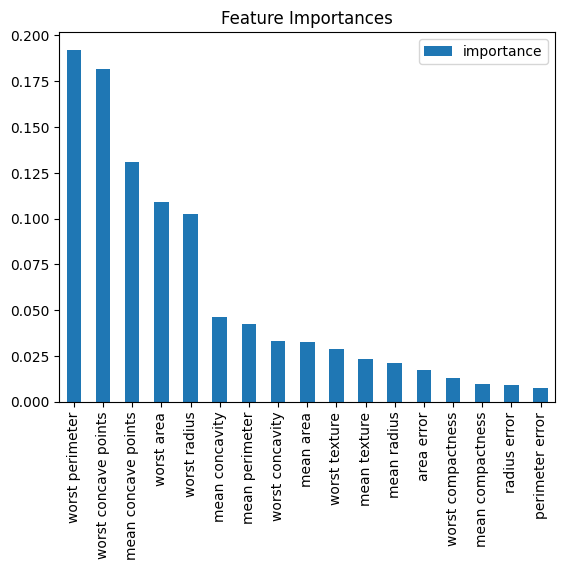

In [13]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = metrics.confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n {cm}')
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print(f'\nTrue Positives: {TP}')
print(f'True Negatives: {TN}')
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')

# Calculate the precision
precision = TP / (TP + FP)
print(f'\nPrecision: {precision:.2f}')

# Calculate the recall
recall = TP / (TP + FN)
print(f'\nRecall: {recall:.2f}')

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_names = row_data_names[index_feature]
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()